In [1]:
#import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
#set viewing options
pd.set_option("display.max_rows", 10000, "display.max_columns", 1000)

In [2]:
#Load, Process,save data
data = pd.read_csv("/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/data/FSDA/FSDA_2.csv")
data = data.dropna()
#routine for saving 
def tf(x):
    return(b + m)
def df(xd):
    return(b + md)

# Graphs (Area, Yield, Production)
  1. Season Specific - Monthly Country
  2. Season Specific - Monthly (Spring vs Wheat Russia)
  3. Average Uncertainty (compared against april) per country for every growing season
  4. Average Uncertainty for every country for each growing season (all countries factored together) 
  5. April of each season for each country ("Final Forecasts")
  6. Comparison of forecasting against global wheat prices (yearly)
  7. Average Uncertanties

In [3]:
#user input
param_inp = input('Do you want to plot Production, Area, or Yield Forecasts? ')
param_inp2 = input('Do you want to plot actual values (AC), absolute uncertainty (AB) ' +
                   'uncertainty (UC) or delta (DE)?')
#if-elif statement
if param_inp == 'Production':
    n  = 'Production'
    n_label = 'Production (Million Metric Tons)'
    if param_inp2 == 'AC':
        param = 'Production'
        label = 'Production'
        label_y = 'Production (Million Metric Tons)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Production/"
    elif param_inp2 == 'AB':
        param = 'Uncertainty-P-abs'
        label = 'Uncertainty-Production-Abs'
        label_y = 'Uncertainty Production (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Production/"
    elif param_inp2 == 'UC':
        param = 'Uncertainty-P'
        label = 'Uncertainty-Production'
        label_y = 'Uncertainty Production (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Production/"
    else:
        param = 'Delta-P'
        label = 'Delta-Production'
        label_y = 'Delta (Actual - Predicted) (mmTons)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Production/"
        
elif param_inp == 'Area':
    n = 'Area'
    n_label = 'Area (Million Hectares)'
    if param_inp2 == 'AC':
        param = 'Area'
        label = 'Area'
        label_y = 'Area (Million Hectares)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Area/"
    elif param_inp2 == 'AB':
        param = 'Uncertainty-A-abs'
        label = 'Uncertainty-Area-Abs'
        label_y = 'Uncertainty Production (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Area/"
    elif param_inp2 == 'UC':
        param = 'Uncertainty-A'
        label = 'Uncertainty-Area'
        label_y = 'Uncertainty Area (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Area/"
    else:
        param = 'Delta-A'
        label = 'Delta-Area'
        label_y = 'Delta (Actual - Predicted) (mHectares)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Area/"
else:
    n = 'Yield'
    n = 'Yield (Metric Tons per Hectare)'
    if param_inp2 == 'DE':
        param = 'Delta-Y'
        label = 'Delta-Yield'
        label_y = 'Yield (Metric Tons per Hectare)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Yield/"
    elif param_inp2 == 'AB':
        param = 'Uncertainty-Y-abs'
        label = 'Uncertainty-Yield-Abs'
        label_y = 'Uncertainty Yield (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Yield/"
    elif param_inp2 == 'UC':
        param = 'Uncertainty-Y'
        label = 'Uncertainty-Yield'
        label_y = 'Uncertainty Yield (%)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Yield/"
    else:
        param = 'Delta-Y'
        label = 'Delta-Yield'
        label_y = 'Delta (Actual - Predicted) (mTons/Hectare)'
        b = "/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Yield/"

print('Russia spring and winter wheat data only available after 2018/19')
ax = input('Do you want to generate graphs for all seasons? (Yes/No): ')
if ax == 'Yes':
    #establish library for repeating for all seasons
    season_lib = data.drop_duplicates(subset=['Year'])
    season_lib = season_lib['Year']
else:
    #ask for specific season
    season = input('Select growing season (i.e 2019/20) to view: ')
    #for saving purposes, replacing / with _
    season_f = season[:4] + '_' + season[5:]
#for average graphing purposes
if param_inp2 == 'AB':
    np = 'Uncertainty-P-abs'
    na = 'Uncertainty-A-abs'
    ny = 'Uncertainty-Y-abs'
    label_n = 'Uncertainty Abs'
    label_y_n = 'Uncertainty (%) Absolute Value'
    
elif param_inp2 == 'UC':
    np = 'Uncertainty-P'
    na = 'Uncertainty-A'
    ny = 'Uncertainty-Y'
    label_n = 'Uncertainty'
    label_y_n = 'Uncertainty (%)'
else:
    np = 'Uncertainty-P'
    na = 'Uncertainty-A'
    ny = 'Uncertainty-Y'
    label_n = 'Uncertainty'
    label_y_n = 'Uncertainty (%)'
    

Do you want to plot Production, Area, or Yield Forecasts? Production
Do you want to plot actual values (AC), absolute uncertainty (AB) uncertainty (UC) or delta (DE)?AC
Russia spring and winter wheat data only available after 2018/19
Do you want to generate graphs for all seasons? (Yes/No): Yes


# Graph an individual parameter for all 3 countries for each year (excluding Russia Winter and Spring Wheat)

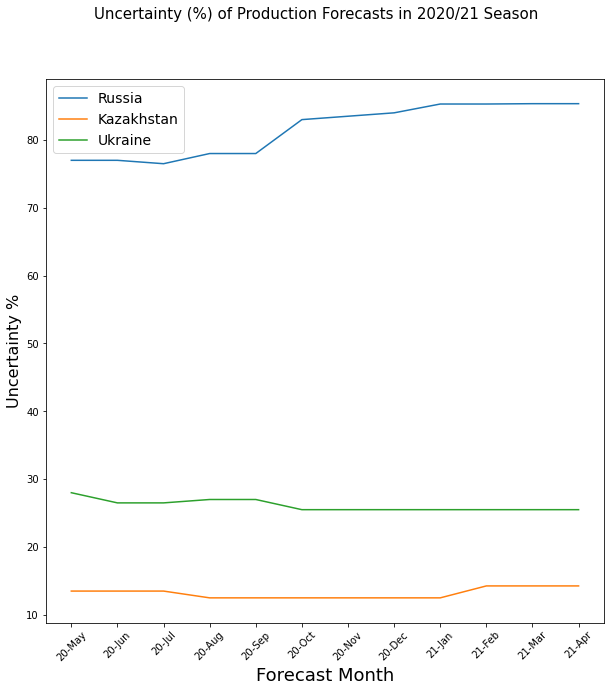

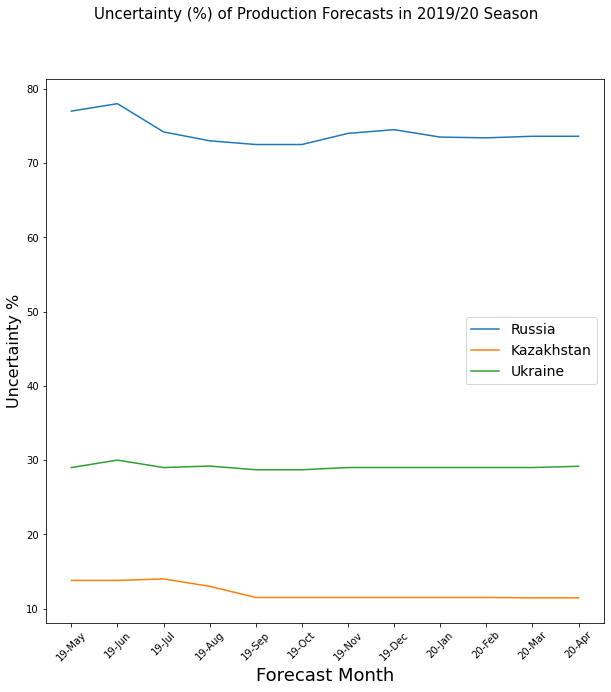

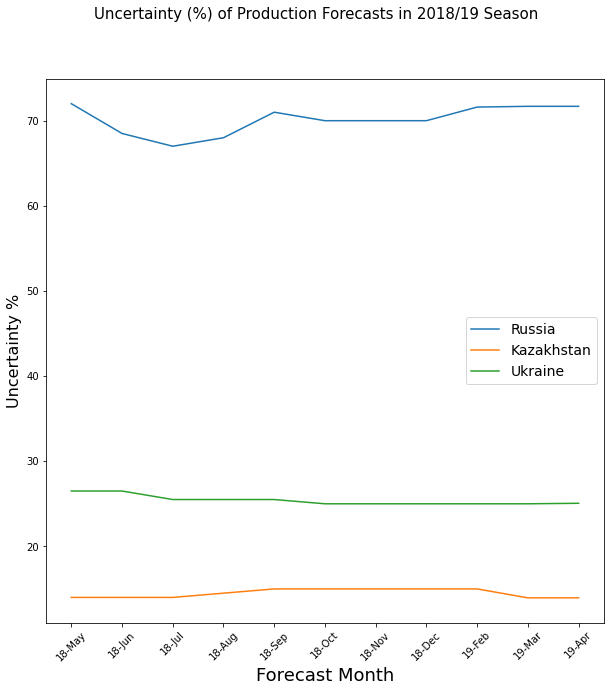

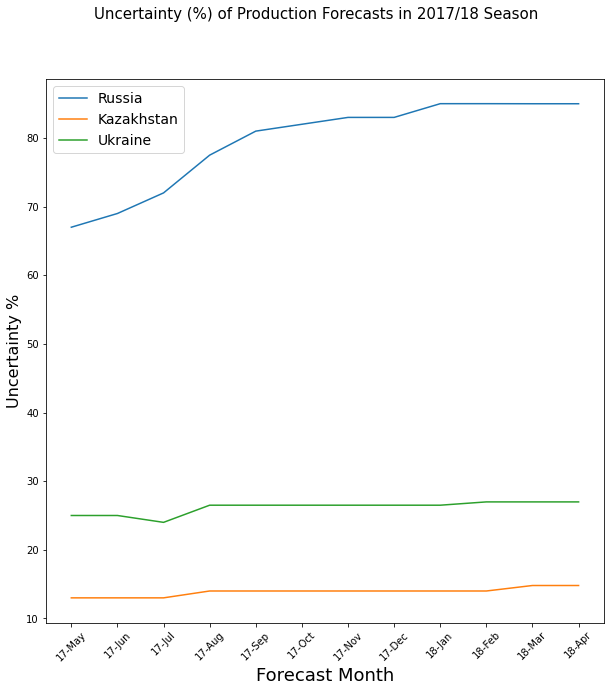

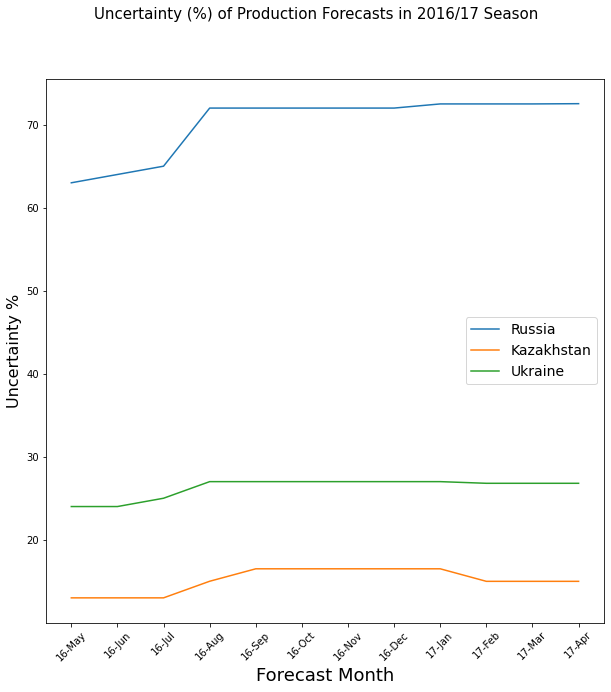

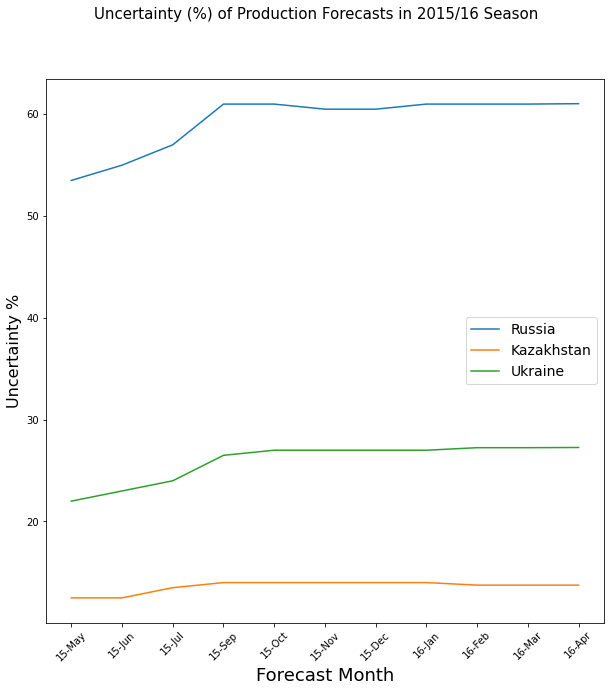

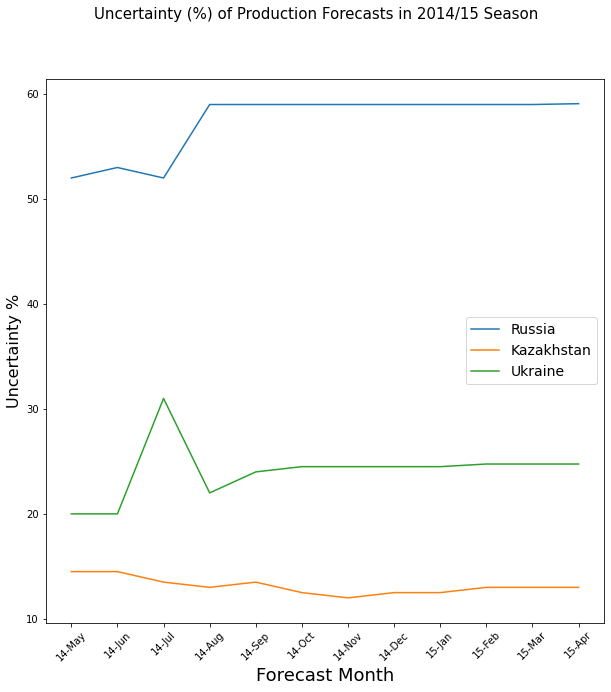

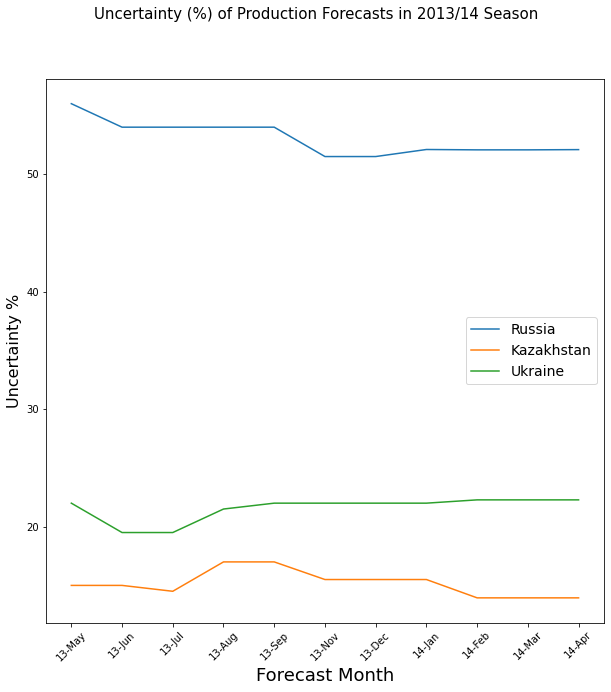

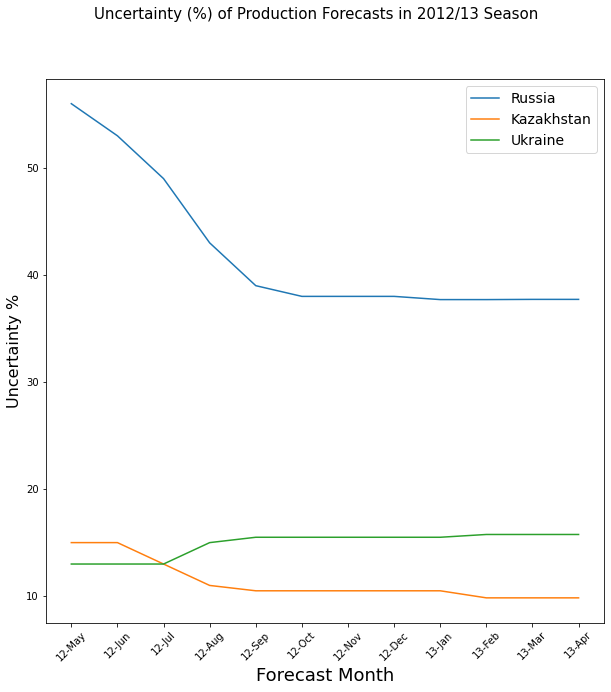

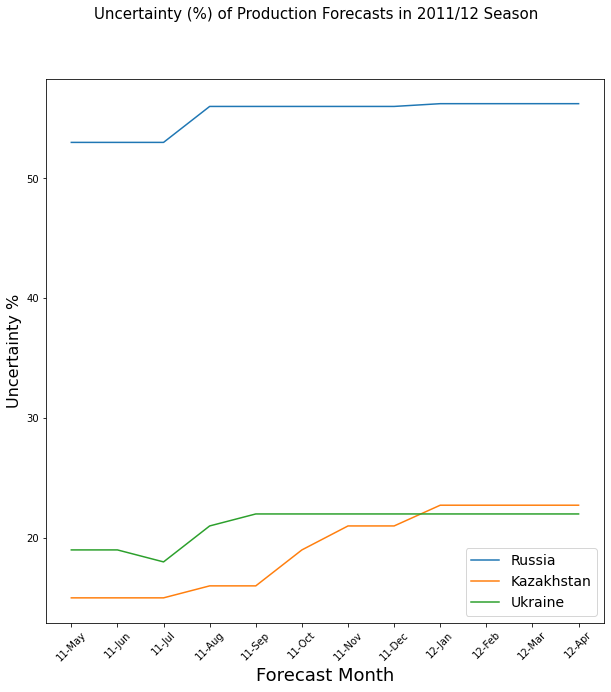

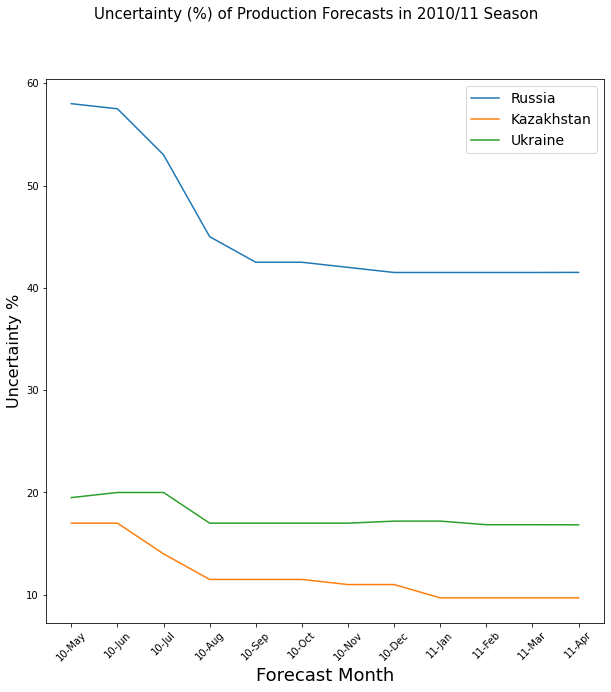

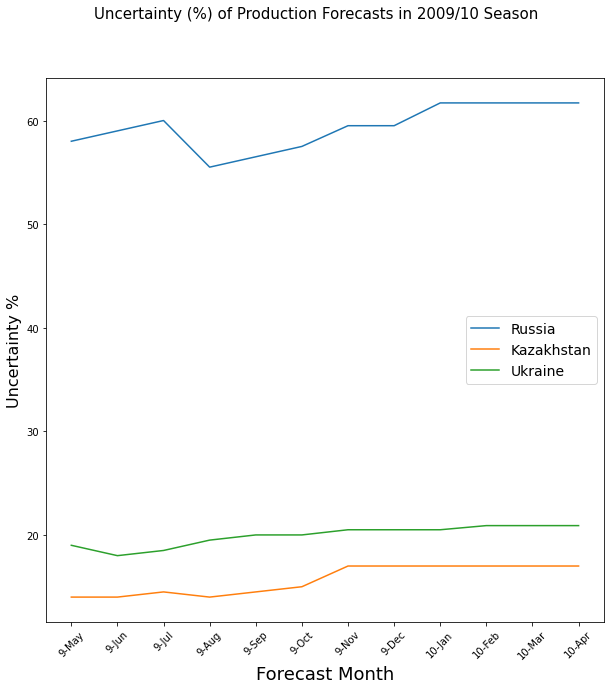

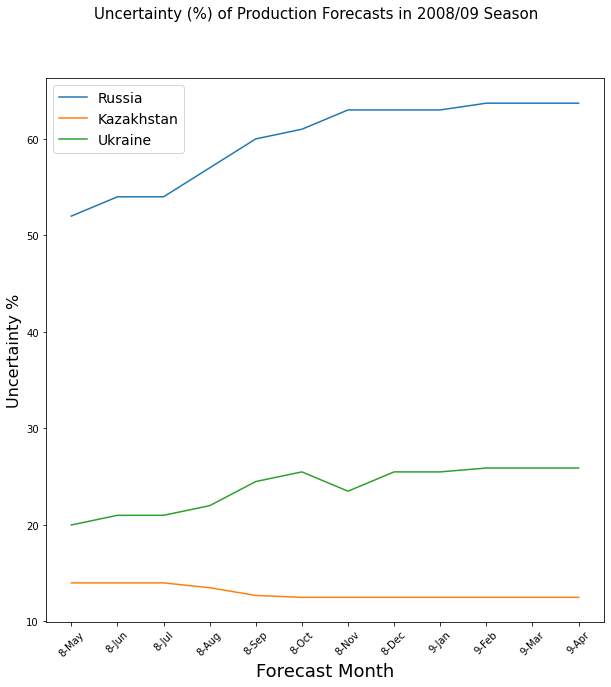

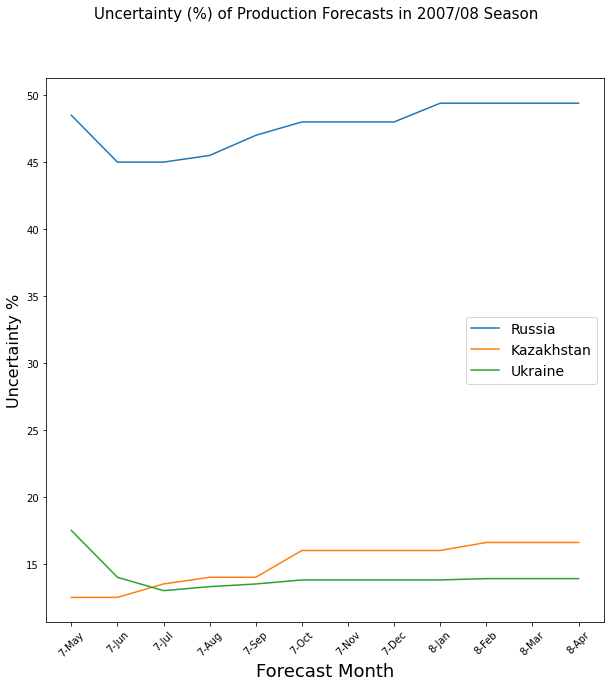

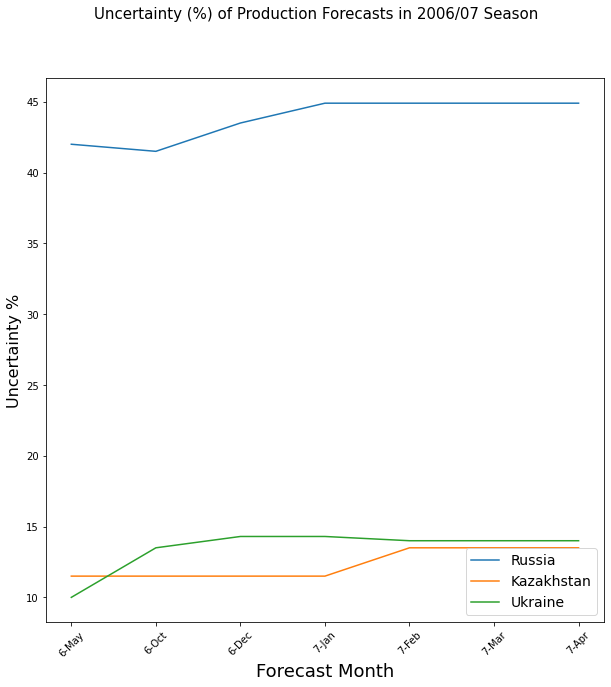

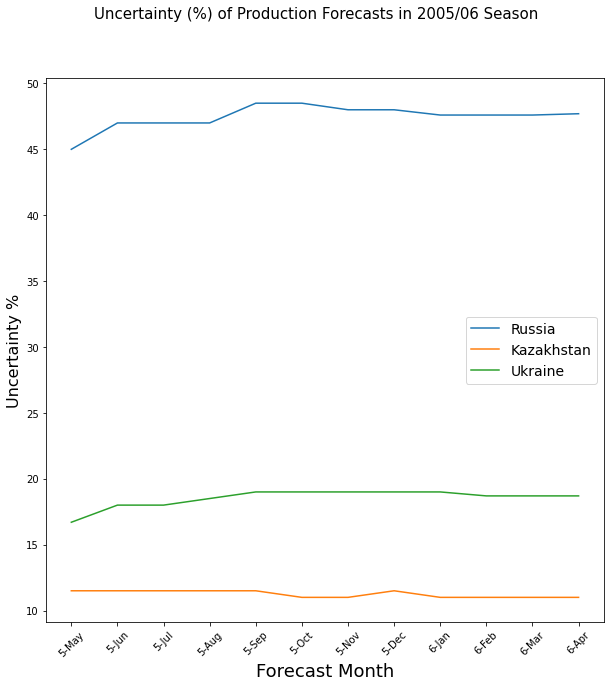

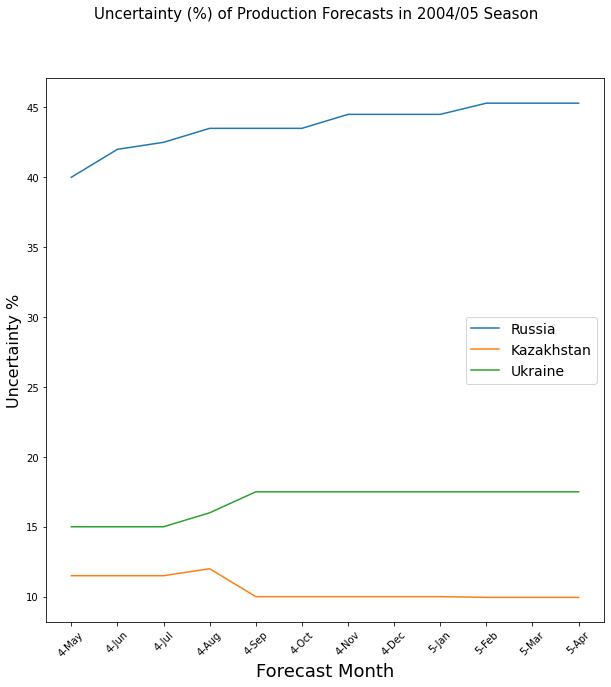

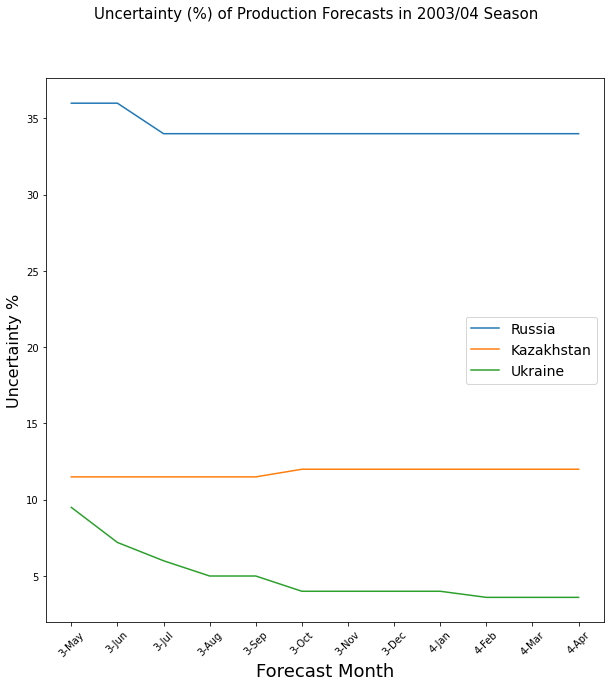

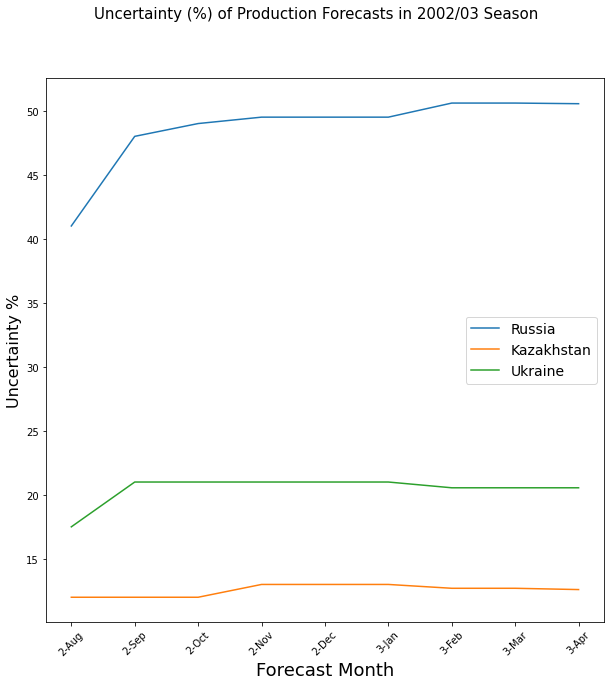

In [4]:
if ax == 'Yes':  
    for i in season_lib:
        #apply season selection
        data1 = data[data['Year'] == i]
        season_f = i[:4] + '_' + i[5:]
        #select each country
        d1 = data1[data1['Country']=='Russia']
        d4 = data1[data1['Country']=='Kazakhstan']
        d5 = data1[data1['Country']=='Ukraine']
        #establish x and y
        y1 = d1[param]
        y4 = d4[param]
        y5 = d5[param]
        x = d1['Report']
        #plot
        fig = plt.figure()
        fig.suptitle('Uncertainty (%) of ' + label + ' Forecasts in '+  i + ' Season' ,fontsize = 15)
        plt.xlabel('Forecast Month',fontsize = 18)
        plt.plot(x,y1,label = 'Russia')
        plt.plot(x,y4,label = 'Kazakhstan')
        plt.plot(x,y5,label = 'Ukraine')
        plt.xticks(rotation = 45)
        plt.gca().invert_xaxis()
        plt.ylabel('Uncertainty %', fontsize = 16)
        fig.set_size_inches(10,10)
        plt.legend(prop = {'size':14})
        #for saving
        m = season_f + '-' + label
        plt.savefig(tf(m))
else:
    #apply season selection
    data1 = data[data['Year'] == season]
    #select each country
    d1 = data1[data1['Country']=='Russia']
    d4 = data1[data1['Country']=='Kazakhstan']
    d5 = data1[data1['Country']=='Ukraine']
    #establish x and y
    y1 = d1[param]
    y4 = d4[param]
    y5 = d5[param]
    x = d1['Report']
    #plot
    fig = plt.figure()
    fig.suptitle(label + ' Forecasts in '+  season + ' Season' ,fontsize = 15)
    plt.xlabel('Forecast Month',fontsize = 18)
    plt.plot(x,y1,label = 'Russia')
    plt.plot(x,y4,label = 'Kazakhstan')
    plt.plot(x,y5,label = 'Ukraine')
    plt.xticks(rotation = 45)
    plt.gca().invert_xaxis()
    plt.ylabel(label_y, fontsize = 16)
    fig.set_size_inches(10,10)
    plt.legend(prop = {'size':14})
    #for saving
    m = season_f + '-' + label
    plt.savefig(tf(m))

# Graphing Winter vs Spring Russian Wheat

In [5]:
if ax == 'Yes':
    for i in season_lib:
        #apply season selection
        data1 = data[data['Year'] == i]
        season_f = i[:4] + '_' + i[5:]
        #apply season selection
        d2 = data1[data1['Country']=='Russia Spring']
        d3 = data1[data1['Country']=='Russia Winter']
        y2 = d2[param] 
        y3 = d3[param]
        x_ws = d3['Report']
        #plot
        fig = plt.figure()
        fig.suptitle('Uncertainty (in %) of '+ label + ' Forecasts in '+  season_f + ' Season' ,fontsize = 15)
        plt.xlabel('Forecast Month',fontsize = 18)
        plt.plot(x_ws,y2,label = 'Russia Spring')
        plt.plot(x_ws,y3,label = 'Russia Winter')
        plt.xticks(rotation = 45)
        plt.gca().invert_xaxis()
        plt.ylabel('Uncertainty % ' + label, fontsize = 16)
        fig.set_size_inches(10,10)
        plt.legend(prop = {'size':14})
        #for saving
        m = season_f + '-' + label +'_spring_winter'
        if i == '2018/19' or i == '2019/20' or i == '2020/21':
            plt.savefig(tf(m))

# Average parameter per country per season

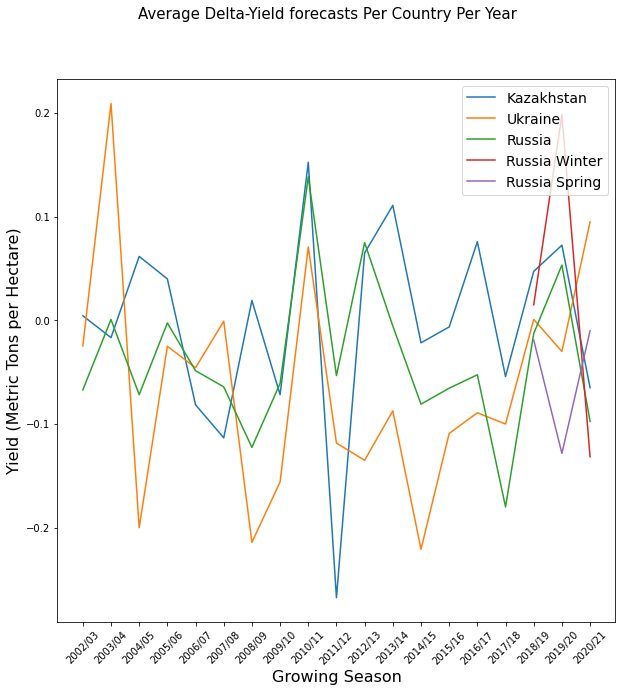

In [6]:
#Get Averages of Uncertainty for each Year per Country
d = data.groupby(['Country','Year']).mean().reset_index()
#remove NA i.e. 2021 season
#Average Uncertainty for each Country each season
d_kaz = d[d['Country']=='Kazakhstan']
d_ukr = d[d['Country']=='Ukraine']
d_rus = d[d['Country']=='Russia']
d_wrus = d[d['Country']=='Russia Winter']
d_srus = d[d['Country']=='Russia Spring']
#Average Uncertainty Forecast per Country
x_kaz = d_kaz[param]
x_ukr = d_ukr[param]
x_rus = d_rus[param]
x_wrus = d_wrus[param]
x_srus = d_srus[param]
y_d = d_kaz['Year']
y_rd = d_wrus['Year']
fig = plt.figure()
fig.suptitle('Average ' + label + ' forecasts ' + 'Per Country Per Year' ,fontsize = 15)
plt.plot(y_d,x_kaz,label ='Kazakhstan')
plt.plot(y_d,x_ukr,label ='Ukraine')
plt.plot(y_d,x_rus,label ='Russia')
plt.plot(y_rd,x_wrus,label = 'Russia Winter')
plt.plot(y_rd,x_srus,label = 'Russia Spring')
plt.xticks(rotation = 45)
plt.ylabel(label_y, fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
fig.set_size_inches(10,10)
plt.legend(prop = {'size':14})
#for saving
m = 'avg_country_' + label
#if file already exists do not update
exists = os.path.isfile(tf(m))
if not os.path.exists(tf(m)+'.png'):
    plt.savefig(tf(m))

# Graph Averages for each Year for all countries

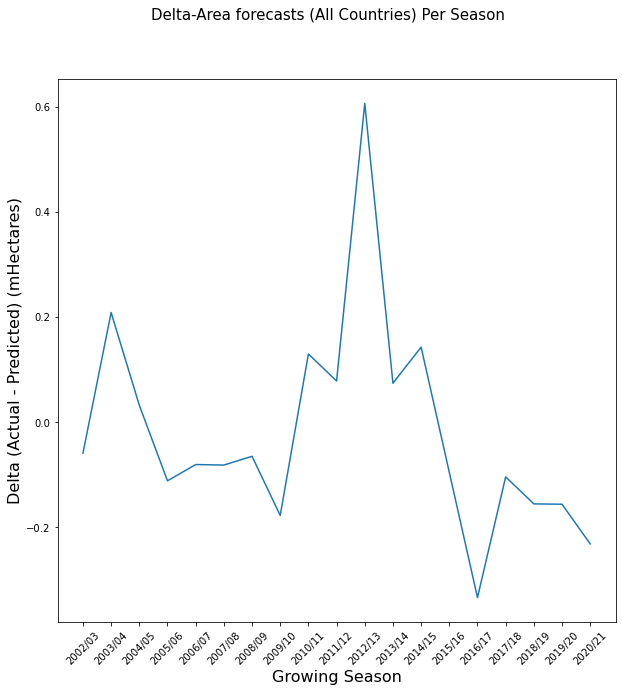

In [7]:
#group by country and year and gather means, reset index for graphing purposes
d = data.groupby(['Country','Year']).mean().reset_index()
#Average Uncertainty of each year of each Country
d_yr_avg = d.groupby(['Year']).mean()
#set index to year
d_yr_avg['Year'] = d_yr_avg.index
#plot Average Uncertainty of each year
x_yr = d_yr_avg['Year']
y_yr = d_yr_avg[param] 
fig = plt.figure()
fig.suptitle(label + ' forecasts (All Countries) Per Season' ,fontsize = 15)
plt.plot(x_yr,y_yr)
plt.xticks(rotation = 45)
plt.ylabel(label_y, fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
fig.set_size_inches(10,10)
#for saving
m = 'avg_' + label
#if file already exists do not update
exists = os.path.isfile(tf(m))
if not os.path.exists(tf(m)+'.png'):
    plt.savefig(tf(m))

# Graph April (Final) of Wheat Crop

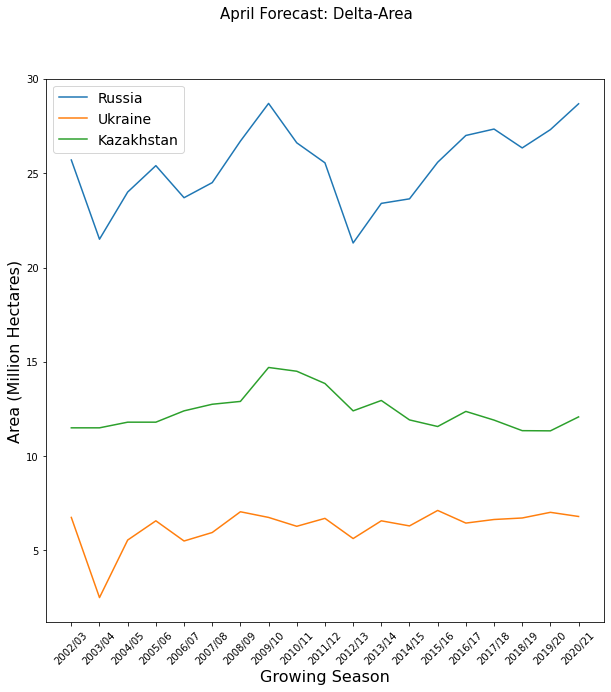

In [8]:
#Isolating Final Area,Yield,and Production Numbers for Each Season
#convert Report to string for ease of filtering
#create string series
str_df = data['Report'].astype(str)
#convert series to dataframe
df_str = str_df.to_frame()
#replace data1 column
data['Report'] = df_str['Report']
#dropNA
data = data.dropna()
#filter for only april dates
data_apr = data[data['Report'].str.contains("Apr")]
#Isolate each countries april reports
rus_apr = data_apr[data_apr['Country'] =='Russia']
ukr_apr = data_apr[data_apr['Country'] =='Ukraine']
kaz_apr = data_apr[data_apr['Country'] =='Kazakhstan']
#create x and y values
y_apr = rus_apr['Year']
x_rus = rus_apr[n]
x_ukr = ukr_apr[n]
x_kaz = kaz_apr[n]
#Graph April Forecast of Wheat Crop in Production
fig = plt.figure()
fig.suptitle('April Forecast: ' + label ,fontsize = 15)
plt.plot(y_apr,x_rus,label = 'Russia')
plt.plot(y_apr,x_ukr,label = 'Ukraine')
plt.plot(y_apr,x_kaz,label = 'Kazakhstan')
plt.xticks(rotation = 45)
plt.ylabel(n_label, fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
fig.set_size_inches(10,10)
plt.gca().invert_xaxis()
plt.legend(prop = {'size':14})
m = 'april_' + label + '_season'
#if file already exists do not update
exists = os.path.isfile(tf(m))
if not os.path.exists(tf(m)+'.png'):
    plt.savefig(tf(m))

# Graph Average Uncertanties

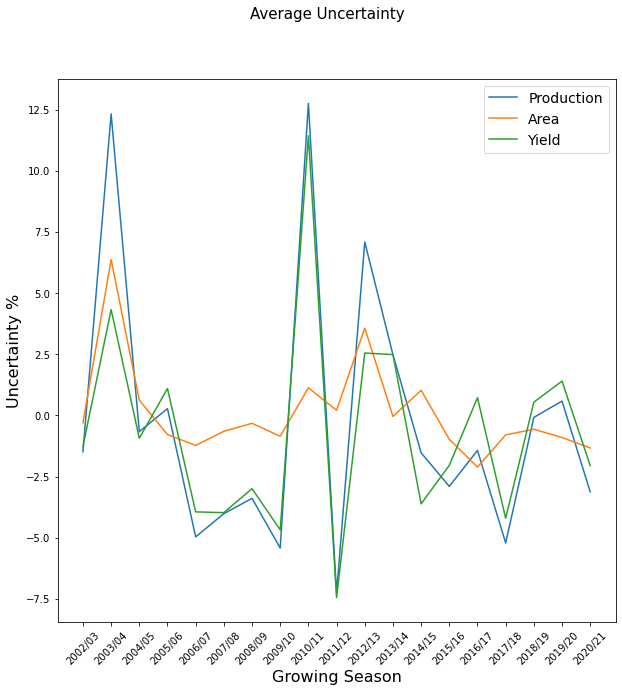

In [9]:
#group by country and year and gather means, reset index for graphing purposes
d = data.groupby(['Country','Year']).mean().reset_index()
#Average Uncertainty of each year of each Country
d_yr_avg = d.groupby(['Year']).mean()
#set index to year
d_yr_avg['Year'] = d_yr_avg.index
x_yr = d_yr_avg['Year']
y_yr_p = d_yr_avg[[np]]
y_yr_a = d_yr_avg[[na]]
y_yr_y = d_yr_avg[[ny]]
fig = plt.figure()
fig.suptitle("Average Uncertainty",fontsize = 15)
plt.plot(x_yr, y_yr_p,label = 'Production')
plt.plot(x_yr, y_yr_a,label = 'Area')
plt.plot(x_yr, y_yr_y,label = 'Yield')
plt.ylabel('Uncertainty %', fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
plt.xticks(rotation = 45)
fig.set_size_inches(10,10)
plt.legend(prop = {'size':14})
#for saving
plt.savefig('/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Average/avg_all.png')

In [10]:
#group by country and year and gather means, reset index for graphing purposes
d = data.groupby(['Country','Year']).mean().reset_index()
#set index to year
x_yr = d_yr_avg['Year']
y_yr_k = d[d['Country']=='Kazakhstan'] 
y_yr_r = d[d['Country']=='Russia'] 
y_yr_u = d[d['Country']=='Ukraine']

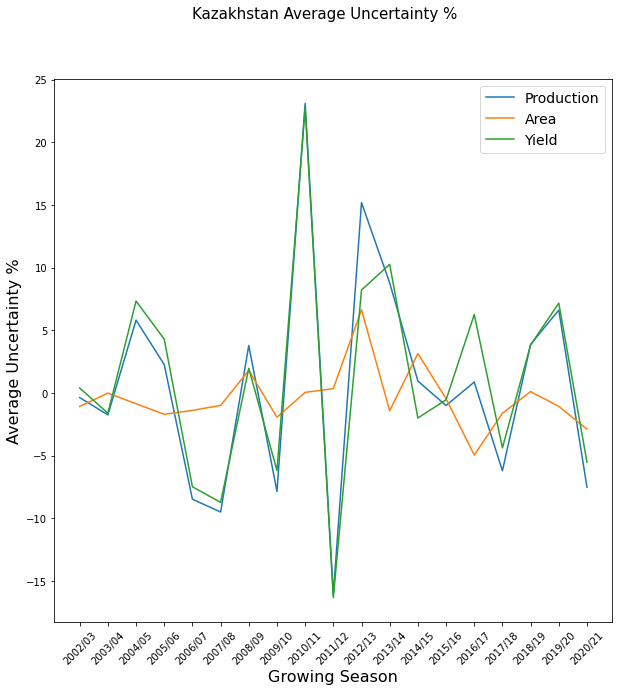

In [11]:
###Kazakhstan 
fig = plt.figure()
fig.suptitle('Kazakhstan Average Uncertainty %' ,fontsize = 15)
plt.plot(x_yr,y_yr_k[np],label = 'Production')
plt.plot(x_yr,y_yr_k[na],label = 'Area')
plt.plot(x_yr,y_yr_k[ny],label = 'Yield')
plt.ylabel('Average Uncertainty %', fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
plt.xticks(rotation = 45)
plt.legend(prop = {'size':14})
fig.set_size_inches(10,10)
plt.savefig('/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Average/avg_all_kaz.png')

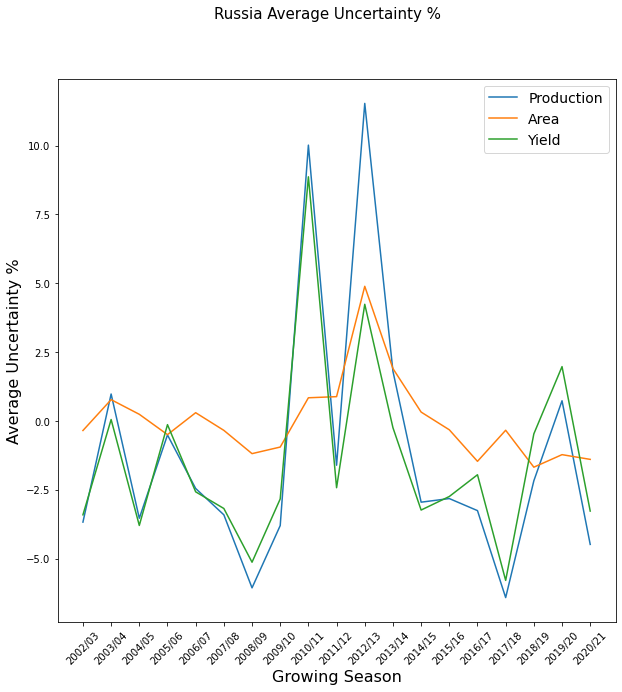

In [12]:
###Russia 
fig = plt.figure()
fig.suptitle('Russia Average Uncertainty %' ,fontsize = 15)
plt.plot(x_yr,y_yr_r[np],label = 'Production')
plt.plot(x_yr,y_yr_r[na],label = 'Area')
plt.plot(x_yr,y_yr_r[ny],label = 'Yield')
plt.ylabel('Average Uncertainty %', fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
plt.xticks(rotation = 45)
plt.legend(prop = {'size':14})
fig.set_size_inches(10,10)
plt.savefig('/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Average/avg_all_rus.png')

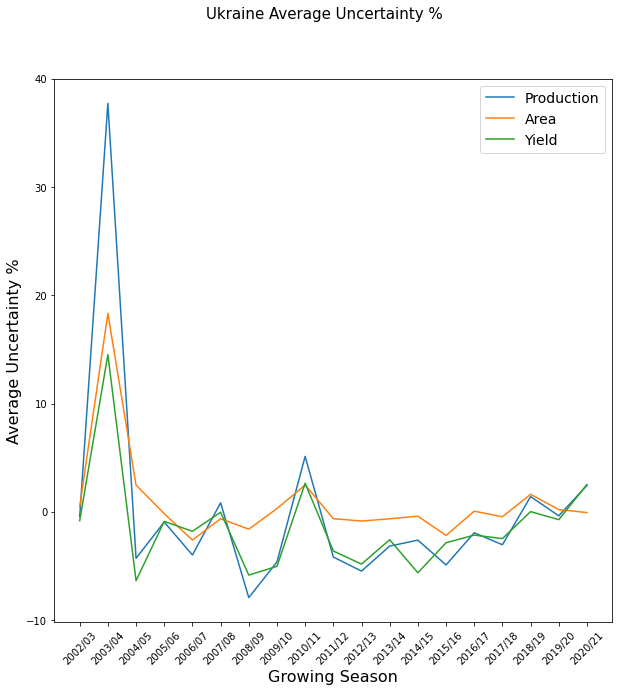

In [13]:
###Ukraine 
fig = plt.figure()
fig.suptitle('Ukraine Average Uncertainty %' ,fontsize = 15)
plt.plot(x_yr,y_yr_u[np],label = 'Production')
plt.plot(x_yr,y_yr_u[na],label = 'Area')
plt.plot(x_yr,y_yr_u[ny],label = 'Yield')
plt.ylabel('Average Uncertainty %', fontsize = 16)
plt.xlabel('Growing Season',fontsize = 16)
plt.xticks(rotation = 45)
plt.legend(prop = {'size':14})
fig.set_size_inches(10,10)
plt.savefig('/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Average/avg_all_ukr.png')

# Plot each countries average uncertainty per month 

In [8]:
data = pd.read_csv("/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/data/FSDA/FSDA_2.csv")
data = data.dropna()
def tf(x):
    return(b + m)
b = '/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/Output/Figs/Monthly_Year/'

In [9]:
#isolate countries and Russian spring/winter wheat
x_months_rus = data[data['Country'] == 'Russia']
x_months_ukr = data[data['Country'] == 'Ukraine']
x_months_kaz = data[data['Country'] == 'Kazakhstan']
x_months_s = data[data['Country'] =='Russia Spring']
x_months_w = data[data['Country'] =='Russia Winter']
#russia
rus_20_21 = x_months_rus[x_months_rus['Year']=='2020/21']
rus_20_19 = x_months_rus[x_months_rus['Year']=='2019/20']
rus_19_18 = x_months_rus[x_months_rus['Year']=='2018/19']
rus_18_17 = x_months_rus[x_months_rus['Year']=='2017/18']
rus_17_16 = x_months_rus[x_months_rus['Year']=='2016/17']
rus_16_15 = x_months_rus[x_months_rus['Year']=='2015/16']
rus_15_14 = x_months_rus[x_months_rus['Year']=='2014/15']
rus_14_13 = x_months_rus[x_months_rus['Year']=='2013/14']
rus_13_12 = x_months_rus[x_months_rus['Year']=='2012/13']
rus_12_11 = x_months_rus[x_months_rus['Year']=='2011/12']
rus_11_10 = x_months_rus[x_months_rus['Year']=='2010/11']
rus_10_09 = x_months_rus[x_months_rus['Year']=='2009/10']
rus_09_08 = x_months_rus[x_months_rus['Year']=='2008/09']
rus_08_07 = x_months_rus[x_months_rus['Year']=='2007/08']
rus_07_06 = x_months_rus[x_months_rus['Year']=='2006/07']
rus_06_05 = x_months_rus[x_months_rus['Year']=='2005/06']
rus_05_04 = x_months_rus[x_months_rus['Year']=='2004/05']
rus_04_03 = x_months_rus[x_months_rus['Year']=='2003/04']
rus_03_02 = x_months_rus[x_months_rus['Year']=='2002/03']
#ukraine
ukr_20_21 = x_months_ukr[x_months_ukr['Year']=='2020/21']
ukr_20_19 = x_months_ukr[x_months_ukr['Year']=='2019/20']
ukr_19_18 = x_months_ukr[x_months_ukr['Year']=='2018/19']
ukr_18_17 = x_months_ukr[x_months_ukr['Year']=='2017/18']
ukr_17_16 = x_months_ukr[x_months_ukr['Year']=='2016/17']
ukr_16_15 = x_months_ukr[x_months_ukr['Year']=='2015/16']
ukr_15_14 = x_months_ukr[x_months_ukr['Year']=='2014/15']
ukr_14_13 = x_months_ukr[x_months_ukr['Year']=='2013/14']
ukr_13_12 = x_months_ukr[x_months_ukr['Year']=='2012/13']
ukr_12_11 = x_months_ukr[x_months_ukr['Year']=='2011/12']
ukr_11_10 = x_months_ukr[x_months_ukr['Year']=='2010/11']
ukr_10_09 = x_months_ukr[x_months_ukr['Year']=='2009/10']
ukr_09_08 = x_months_ukr[x_months_ukr['Year']=='2008/09']
ukr_08_07 = x_months_ukr[x_months_ukr['Year']=='2007/08']
ukr_07_06 = x_months_ukr[x_months_ukr['Year']=='2006/07']
ukr_06_05 = x_months_ukr[x_months_ukr['Year']=='2005/06']
ukr_05_04 = x_months_ukr[x_months_ukr['Year']=='2004/05']
ukr_04_03 = x_months_ukr[x_months_ukr['Year']=='2003/04']
ukr_03_02 = x_months_ukr[x_months_ukr['Year']=='2002/03']
#Kazakhstan
kaz_20_21 = x_months_kaz[x_months_kaz['Year']=='2020/21']
kaz_20_19 = x_months_kaz[x_months_kaz['Year']=='2019/20']
kaz_19_18 = x_months_kaz[x_months_kaz['Year']=='2018/19']
kaz_18_17 = x_months_kaz[x_months_kaz['Year']=='2017/18']
kaz_17_16 = x_months_kaz[x_months_kaz['Year']=='2016/17']
kaz_16_15 = x_months_kaz[x_months_kaz['Year']=='2015/16']
kaz_15_14 = x_months_kaz[x_months_kaz['Year']=='2014/15']
kaz_14_13 = x_months_kaz[x_months_kaz['Year']=='2013/14']
kaz_13_12 = x_months_kaz[x_months_kaz['Year']=='2012/13']
kaz_12_11 = x_months_kaz[x_months_kaz['Year']=='2011/12']
kaz_11_10 = x_months_kaz[x_months_kaz['Year']=='2010/11']
kaz_10_09 = x_months_kaz[x_months_kaz['Year']=='2009/10']
kaz_09_08 = x_months_kaz[x_months_kaz['Year']=='2008/09']
kaz_08_07 = x_months_kaz[x_months_kaz['Year']=='2007/08']
kaz_07_06 = x_months_kaz[x_months_kaz['Year']=='2006/07']
kaz_06_05 = x_months_kaz[x_months_kaz['Year']=='2005/06']
kaz_05_04 = x_months_kaz[x_months_kaz['Year']=='2004/05']
kaz_04_03 = x_months_kaz[x_months_kaz['Year']=='2003/04']
kaz_03_02 = x_months_kaz[x_months_kaz['Year']=='2002/03']
#averages and organize indicies for matching
rus_avg = x_months_rus.groupby('Report_Month').mean()
rus_avg = rus_avg.reindex(index=rus_20_21['Report_Month'])
rus_avg = rus_avg.reset_index()
ukr_avg = x_months_ukr.groupby('Report_Month').mean()
ukr_avg = ukr_avg.reindex(index=ukr_20_21['Report_Month'])
ukr_avg = ukr_avg.reset_index()
kaz_avg = x_months_kaz.groupby('Report_Month').mean()
kaz_avg = kaz_avg.reindex(index=kaz_20_21['Report_Month'])
kaz_avg = kaz_avg.reset_index()
x_s_avg = x_months_s.groupby('Report_Month').mean()
x_s_avg = x_s_avg.reindex(index=rus_20_21['Report_Month'])
x_s_avg = x_s_avg.reset_index()
x_w_avg = x_months_w.groupby('Report_Month').mean()
x_w_avg = rus_avg.reindex(index=rus_20_21['Report_Month'])
x_w_avg = rus_avg.reset_index()

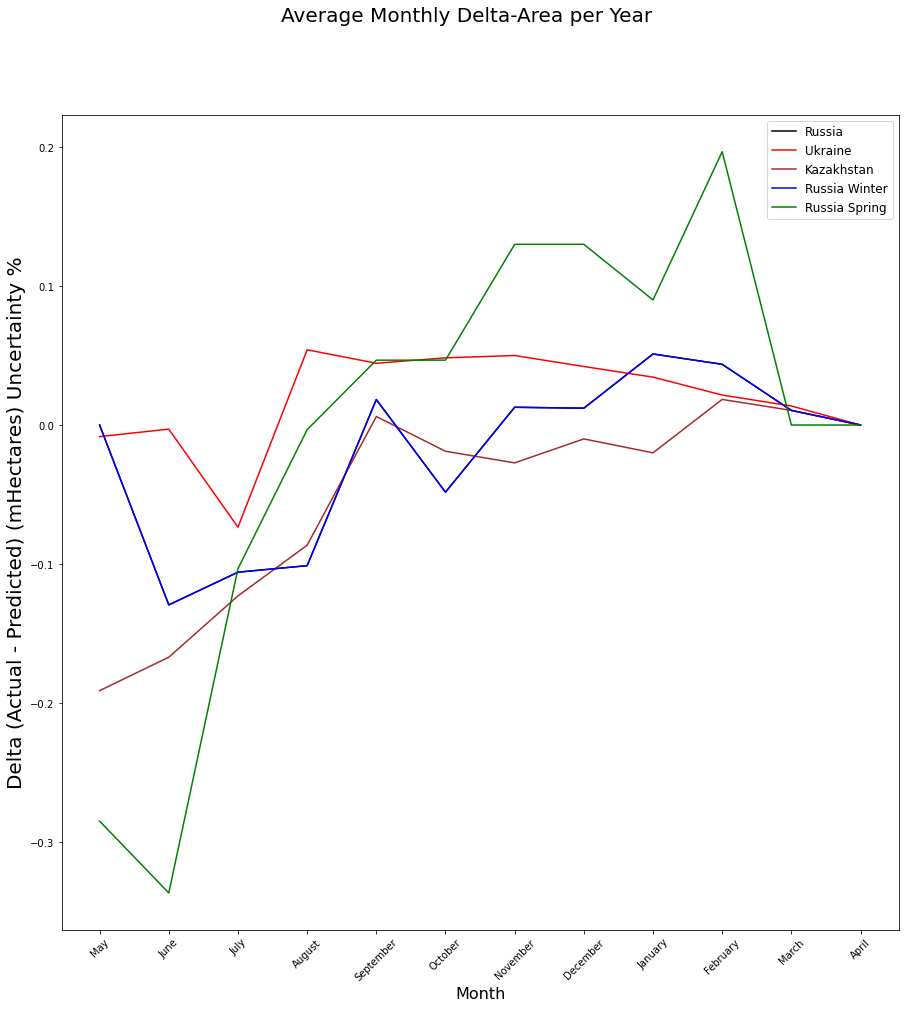

In [16]:
#plot averages
fig = plt.figure()
fig.suptitle('Average Monthly '+ label + ' per Year',fontsize = 20)
plt.plot(rus_20_21['Report_Month'],rus_avg[param],label ='Russia',color = 'black')
plt.plot(rus_20_21['Report_Month'],ukr_avg[param],label = 'Ukraine',color = 'red')
plt.plot(rus_20_21['Report_Month'],kaz_avg[param],label = 'Kazakhstan',color = 'brown')
plt.plot(rus_20_21['Report_Month'],x_w_avg[param],label = 'Russia Winter',color = 'blue')
plt.plot(rus_20_21['Report_Month'],x_s_avg[param],label = 'Russia Spring',color = 'green')
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.ylabel(label_y + ' Uncertainty %',fontsize = 20)
plt.xlabel('Month',fontsize = 16)
plt.legend(prop = {'size':12},loc='upper right')
fig.set_size_inches(15,15)
m = 'avg_yr_mt_' + label
plt.savefig(tf(m))

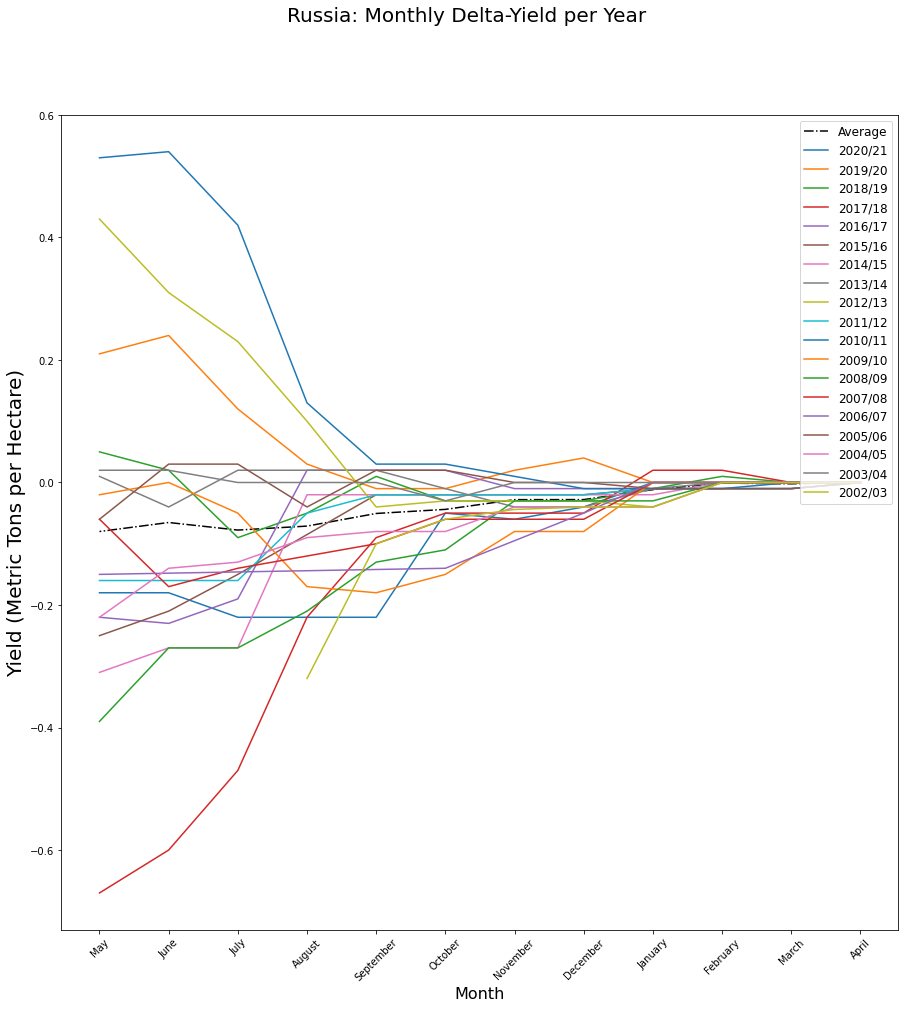

In [10]:
#plot Russia Uncertainity
fig = plt.figure()
fig.suptitle('Russia: Monthly '+ label + ' per Year',fontsize = 20)
plt.plot(rus_avg['Report_Month'],rus_avg[param],'-.',label ='Average',color = 'black')
plt.plot(rus_20_21['Report_Month'],rus_20_21[param],label = '2020/21')
plt.plot(rus_20_19['Report_Month'],rus_20_19[param],label = '2019/20')
plt.plot(rus_19_18['Report_Month'],rus_19_18[param],label = '2018/19')
plt.plot(rus_18_17['Report_Month'],rus_18_17[param],label = '2017/18')
plt.plot(rus_17_16['Report_Month'],rus_17_16[param],label = '2016/17')
plt.plot(rus_16_15['Report_Month'],rus_16_15[param],label = '2015/16')
plt.plot(rus_15_14['Report_Month'],rus_15_14[param],label = '2014/15')
plt.plot(rus_14_13['Report_Month'],rus_14_13[param],label = '2013/14')
plt.plot(rus_13_12['Report_Month'],rus_13_12[param],label = '2012/13')
plt.plot(rus_12_11['Report_Month'],rus_12_11[param],label = '2011/12')
plt.plot(rus_11_10['Report_Month'],rus_11_10[param],label = '2010/11')
plt.plot(rus_10_09['Report_Month'],rus_10_09[param],label = '2009/10')
plt.plot(rus_09_08['Report_Month'],rus_09_08[param],label = '2008/09')
plt.plot(rus_08_07['Report_Month'],rus_08_07[param],label = '2007/08')
plt.plot(rus_07_06['Report_Month'],rus_07_06[param],label = '2006/07')
plt.plot(rus_06_05['Report_Month'],rus_06_05[param],label = '2005/06')
plt.plot(rus_05_04['Report_Month'],rus_05_04[param],label = '2004/05')
plt.plot(rus_04_03['Report_Month'],rus_04_03[param],label = '2003/04')
plt.plot(rus_03_02['Report_Month'],rus_03_02[param],label = '2002/03')
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.ylabel(label_y ,fontsize = 20)
plt.xlabel('Month',fontsize = 16)
plt.legend(prop = {'size':12},loc='upper right')
fig.set_size_inches(15,15)
m = 'rus_yr_mt_' + label
plt.savefig(tf(m))

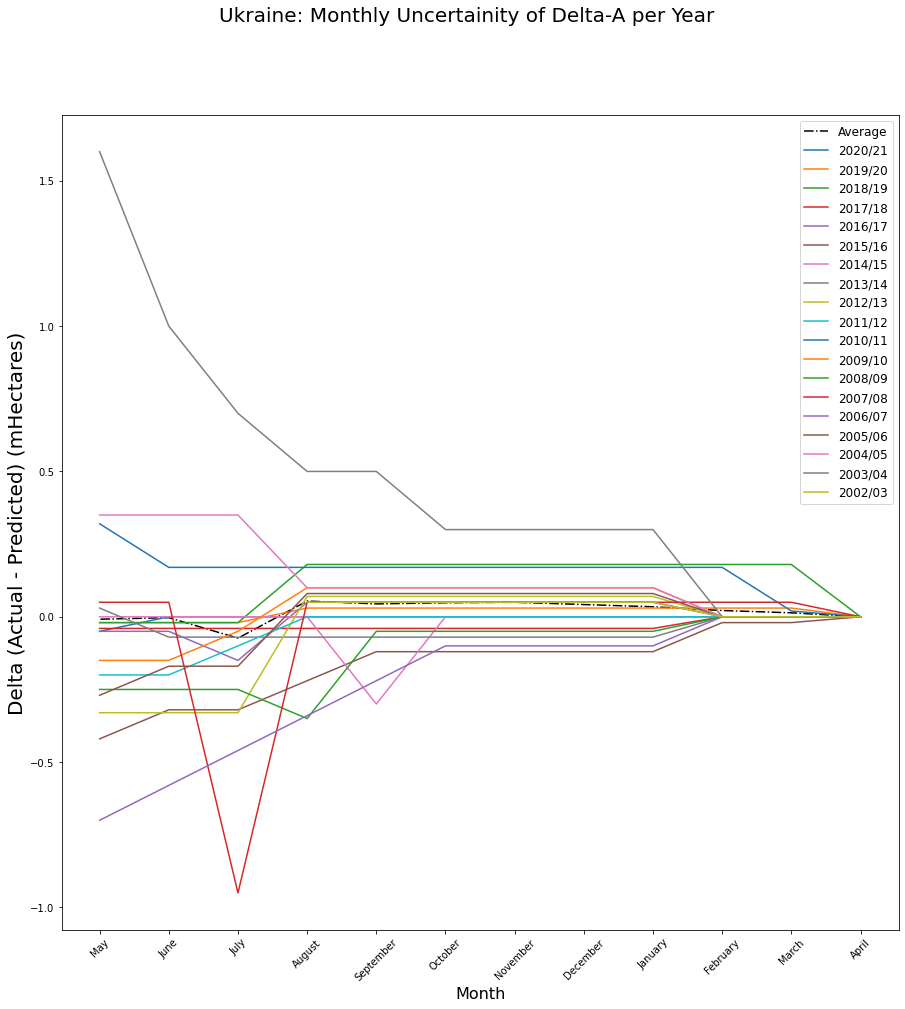

In [23]:
#plot Ukraine Uncertainity
fig = plt.figure()
fig.suptitle('Ukraine: Monthly ' + label + ' per Year',fontsize = 20)
plt.plot(rus_20_21['Report_Month'],ukr_avg[param],'-.',label ='Average',color = 'black')
plt.plot(ukr_20_21['Report_Month'],ukr_20_21[param],label = '2020/21')
plt.plot(ukr_20_19['Report_Month'],ukr_20_19[param],label = '2019/20')
plt.plot(ukr_19_18['Report_Month'],ukr_19_18[param],label = '2018/19')
plt.plot(ukr_18_17['Report_Month'],ukr_18_17[param],label = '2017/18')
plt.plot(ukr_17_16['Report_Month'],ukr_17_16[param],label = '2016/17')
plt.plot(ukr_16_15['Report_Month'],ukr_16_15[param],label = '2015/16')
plt.plot(ukr_15_14['Report_Month'],ukr_15_14[param],label = '2014/15')
plt.plot(ukr_14_13['Report_Month'],ukr_14_13[param],label = '2013/14')
plt.plot(ukr_13_12['Report_Month'],ukr_13_12[param],label = '2012/13')
plt.plot(ukr_12_11['Report_Month'],ukr_12_11[param],label = '2011/12')
plt.plot(ukr_11_10['Report_Month'],ukr_11_10[param],label = '2010/11')
plt.plot(ukr_10_09['Report_Month'],ukr_10_09[param],label = '2009/10')
plt.plot(ukr_09_08['Report_Month'],ukr_09_08[param],label = '2008/09')
plt.plot(ukr_08_07['Report_Month'],ukr_08_07[param],label = '2007/08')
plt.plot(ukr_07_06['Report_Month'],ukr_07_06[param],label = '2006/07')
plt.plot(ukr_06_05['Report_Month'],ukr_06_05[param],label = '2005/06')
plt.plot(ukr_05_04['Report_Month'],ukr_05_04[param],label = '2004/05')
plt.plot(ukr_04_03['Report_Month'],ukr_04_03[param],label = '2003/04')
plt.plot(ukr_03_02['Report_Month'],ukr_03_02[param],label = '2002/03')
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.ylabel(label_y,fontsize = 20)
plt.xlabel('Month',fontsize = 16)
plt.legend(prop = {'size':12},loc='upper right')
fig.set_size_inches(15,15)
m = 'ukr_yr_mt_' + label
plt.savefig(tf(m))

In [24]:
x_months_s = data[data['Country'] =='Russia Spring']
x_months_w = data[data['Country'] =='Russia Winter']
rus_spring_20_21 = x_months_s[x_months_s['Year']=='2020/21']
rus_spring_20_19 = x_months_s[x_months_s['Year']=='2019/20']
rus_spring_19_18 = x_months_s[x_months_s['Year']=='2018/19']
rus_winter_20_21 = x_months_w[x_months_w['Year']=='2020/21']
rus_winter_20_19 = x_months_w[x_months_w['Year']=='2019/20']
rus_winter_19_18 = x_months_w[x_months_w['Year']=='2018/19']

In [ ]:
#Russia Spring & Winter
fig = plt.figure()
fig.suptitle('Russia Spring & Winter: Monthly '+ label + ' per Year',fontsize = 20)
plt.plot(rus_spring_20_21['Report_Month'],rus_spring_20_21[param],label = '2020/21 Spring',color ='black')
plt.plot(rus_spring_20_19['Report_Month'],rus_spring_20_19[param],label = '2019/20 Spring',color ='green')
plt.plot(rus_spring_19_18['Report_Month'],rus_spring_19_18[param],label = '2018/19 Spring',color = 'blue')
plt.plot(rus_spring_20_21['Report_Month'],x_s_avg[param],'--',label = 'Spring Average',color =  'maroon')
plt.plot(rus_winter_20_21['Report_Month'],x_w_avg[param],'--',label = 'Winter Average',color = 'magenta')
plt.plot(rus_winter_20_21['Report_Month'],rus_winter_20_21[param],label = '2020/21 Winter',color = 'purple')
plt.plot(rus_winter_20_19['Report_Month'],rus_winter_20_19[param],label = '2019/20 Winter',color = 'red')
plt.plot(rus_winter_19_18['Report_Month'],rus_winter_19_18[param],label = '2018/19 Winter',color = 'pink')
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.ylabel(label_y ,fontsize = 20)
plt.xlabel('Month',fontsize = 16)
plt.legend(prop = {'size':15})
fig.set_size_inches(15,15)
m = 'rus_spr_' + label
plt.savefig(tf(m))

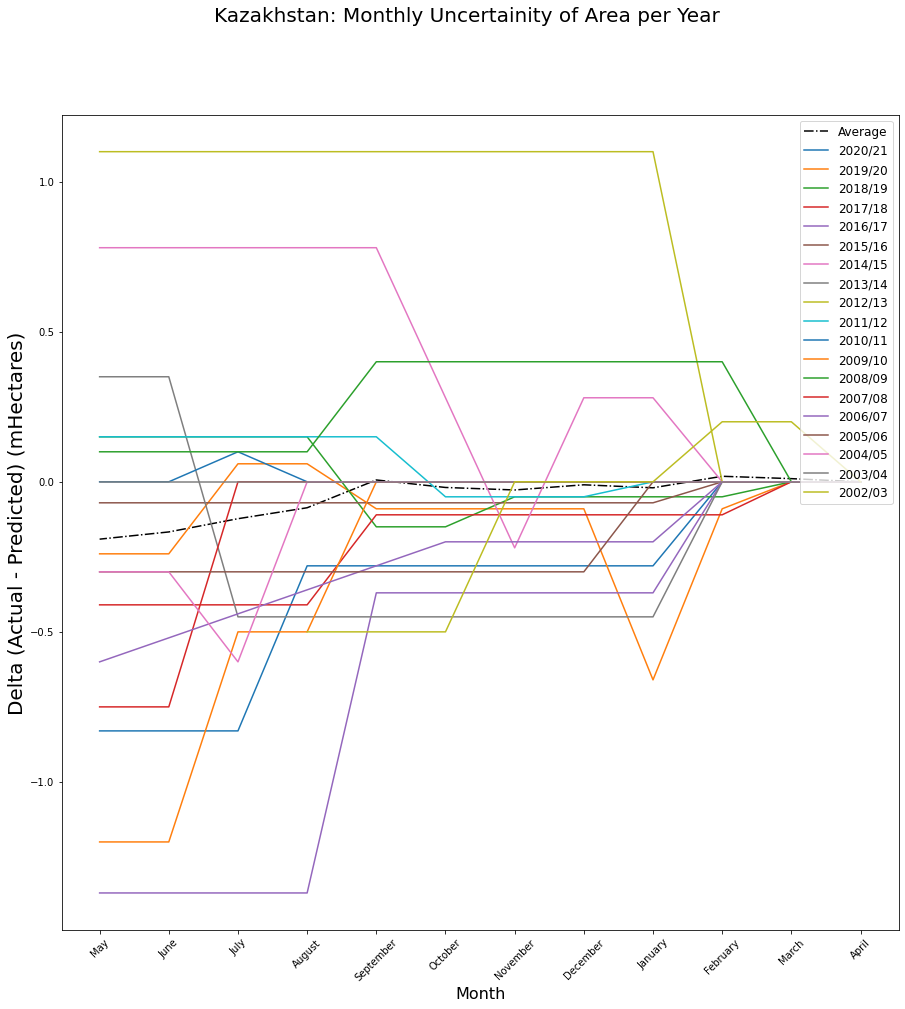

In [25]:
#plot Kazakhstan Uncertainity
fig = plt.figure()
fig.suptitle('Kazakhstan: Monthly Uncertainity of '+ param + ' per Year',fontsize = 20)
plt.plot(rus_20_21['Report_Month'],kaz_avg[param],'-.',label ='Average',color = 'black')
plt.plot(kaz_20_21['Report_Month'],kaz_20_21[param],label = '2020/21')
plt.plot(kaz_20_19['Report_Month'],kaz_20_19[param],label = '2019/20')
plt.plot(kaz_19_18['Report_Month'],kaz_19_18[param],label = '2018/19')
plt.plot(kaz_18_17['Report_Month'],kaz_18_17[param],label = '2017/18')
plt.plot(kaz_17_16['Report_Month'],kaz_17_16[param],label = '2016/17')
plt.plot(kaz_16_15['Report_Month'],kaz_16_15[param],label = '2015/16')
plt.plot(kaz_15_14['Report_Month'],kaz_15_14[param],label = '2014/15')
plt.plot(kaz_14_13['Report_Month'],kaz_14_13[param],label = '2013/14')
plt.plot(kaz_13_12['Report_Month'],kaz_13_12[param],label = '2012/13')
plt.plot(kaz_12_11['Report_Month'],kaz_12_11[param],label = '2011/12')
plt.plot(kaz_11_10['Report_Month'],kaz_11_10[param],label = '2010/11')
plt.plot(kaz_10_09['Report_Month'],kaz_10_09[param],label = '2009/10')
plt.plot(kaz_09_08['Report_Month'],kaz_09_08[param],label = '2008/09')
plt.plot(kaz_08_07['Report_Month'],kaz_08_07[param],label = '2007/08')
plt.plot(kaz_07_06['Report_Month'],kaz_07_06[param],label = '2006/07')
plt.plot(kaz_06_05['Report_Month'],kaz_06_05[param],label = '2005/06')
plt.plot(kaz_05_04['Report_Month'],kaz_05_04[param],label = '2004/05')
plt.plot(kaz_04_03['Report_Month'],kaz_04_03[param],label = '2003/04')
plt.plot(kaz_03_02['Report_Month'],kaz_03_02[param],label = '2002/03')
plt.gca().invert_xaxis()
plt.xticks(rotation = 45)
plt.ylabel(label_y,fontsize = 20)
plt.xlabel('Month',fontsize = 16)
plt.legend(prop = {'size':12},loc='upper right')
fig.set_size_inches(15,15)
m = 'kaz_yr_mt_' + label
plt.savefig(tf(m))

In [ ]:
#Top uncertainty


In [40]:
price = pd.read_csv("/Users/christianabys/Desktop/School/Maryland/Research/Wheat_Forecast/data/wheat_p.csv")
price = price.iloc[2:, :].set_index('Date')
price = price.reset_index()
price = price.rename(columns={"Date":"Report"})
price = data.merge(price, on = 'Report' )
price_d = price.groupby(['Year']).mean().reset_index()
x_pr = price_d['Price']
y_pr = price_d['Year']
x_rus = rus_apr[label]
x_ukr = ukr_apr[label]
x_kaz = kaz_apr[label]
#create dataframe, reset and reverse index, rename columns
x_rus_df = x_rus.to_frame().reset_index(drop = True).rename(columns = {label:"Rus-P"})
x_ukr_df = x_ukr.to_frame().reset_index(drop = True).rename(columns = {label:"Ukr-P"})
x_kaz_df = x_kaz.to_frame().reset_index(drop = True).rename(columns = {label:"Kaz-P"})
#create year df for joining purposes
price_year = price_d.Year[::-1].to_frame().reset_index(drop = True)
#join on original
price_year1 = price_year.join(x_rus_df)
price_year2 = price_year1.join(x_ukr_df)
price_year3 = price_year2.join(x_kaz_df)
price_d_p = price_year3.merge(price_d, on = 'Year')
#Plot 
x = price_d_p['Year']
fig,ax = plt.subplots()
plt.xticks(rotation = 45)
ax2 = ax.twinx()
plt.gca().invert_xaxis()
fig.suptitle( label + ' Forecast vs Global Price' ,fontsize = 15)
ax.plot(x,price_d_p['Rus-P'],label = 'Russia')
ax.plot(x,price_d_p['Ukr-P'],label = 'Ukraine')
ax.plot(x,price_d_p['Kaz-P'],label = 'Kazakhstan')
ax.set_ylabel( label_y, fontsize = 16)
ax.set_xlabel('Growing Season',fontsize = 16)
ax2.plot(x,price_d_p.Price,color = 'Black',label = 'Wheat Price $')
ax2.set_ylabel('Global Wheat Price (USD/Metric Ton)',fontsize = 16)
fig.set_size_inches(10,10)
ax.legend(prop = {'size':14})
ax2.legend(prop = {'size':14})
m = 'wheat_price_' + label
#if file already exists do not update
exists = os.path.isfile(tf(m))
if not os.path.exists(tf(m)+'.png'):
    plt.savefig(tf(m))

KeyError: 'Delta-Area'